In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
df = pd.read_csv("Cars (1).csv")
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
df.describe()
# No missing values as count is 81
# Positive skewness is there in HP as mean > median (50%)
# In HP outliers are there as huge difference in 75% and max

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


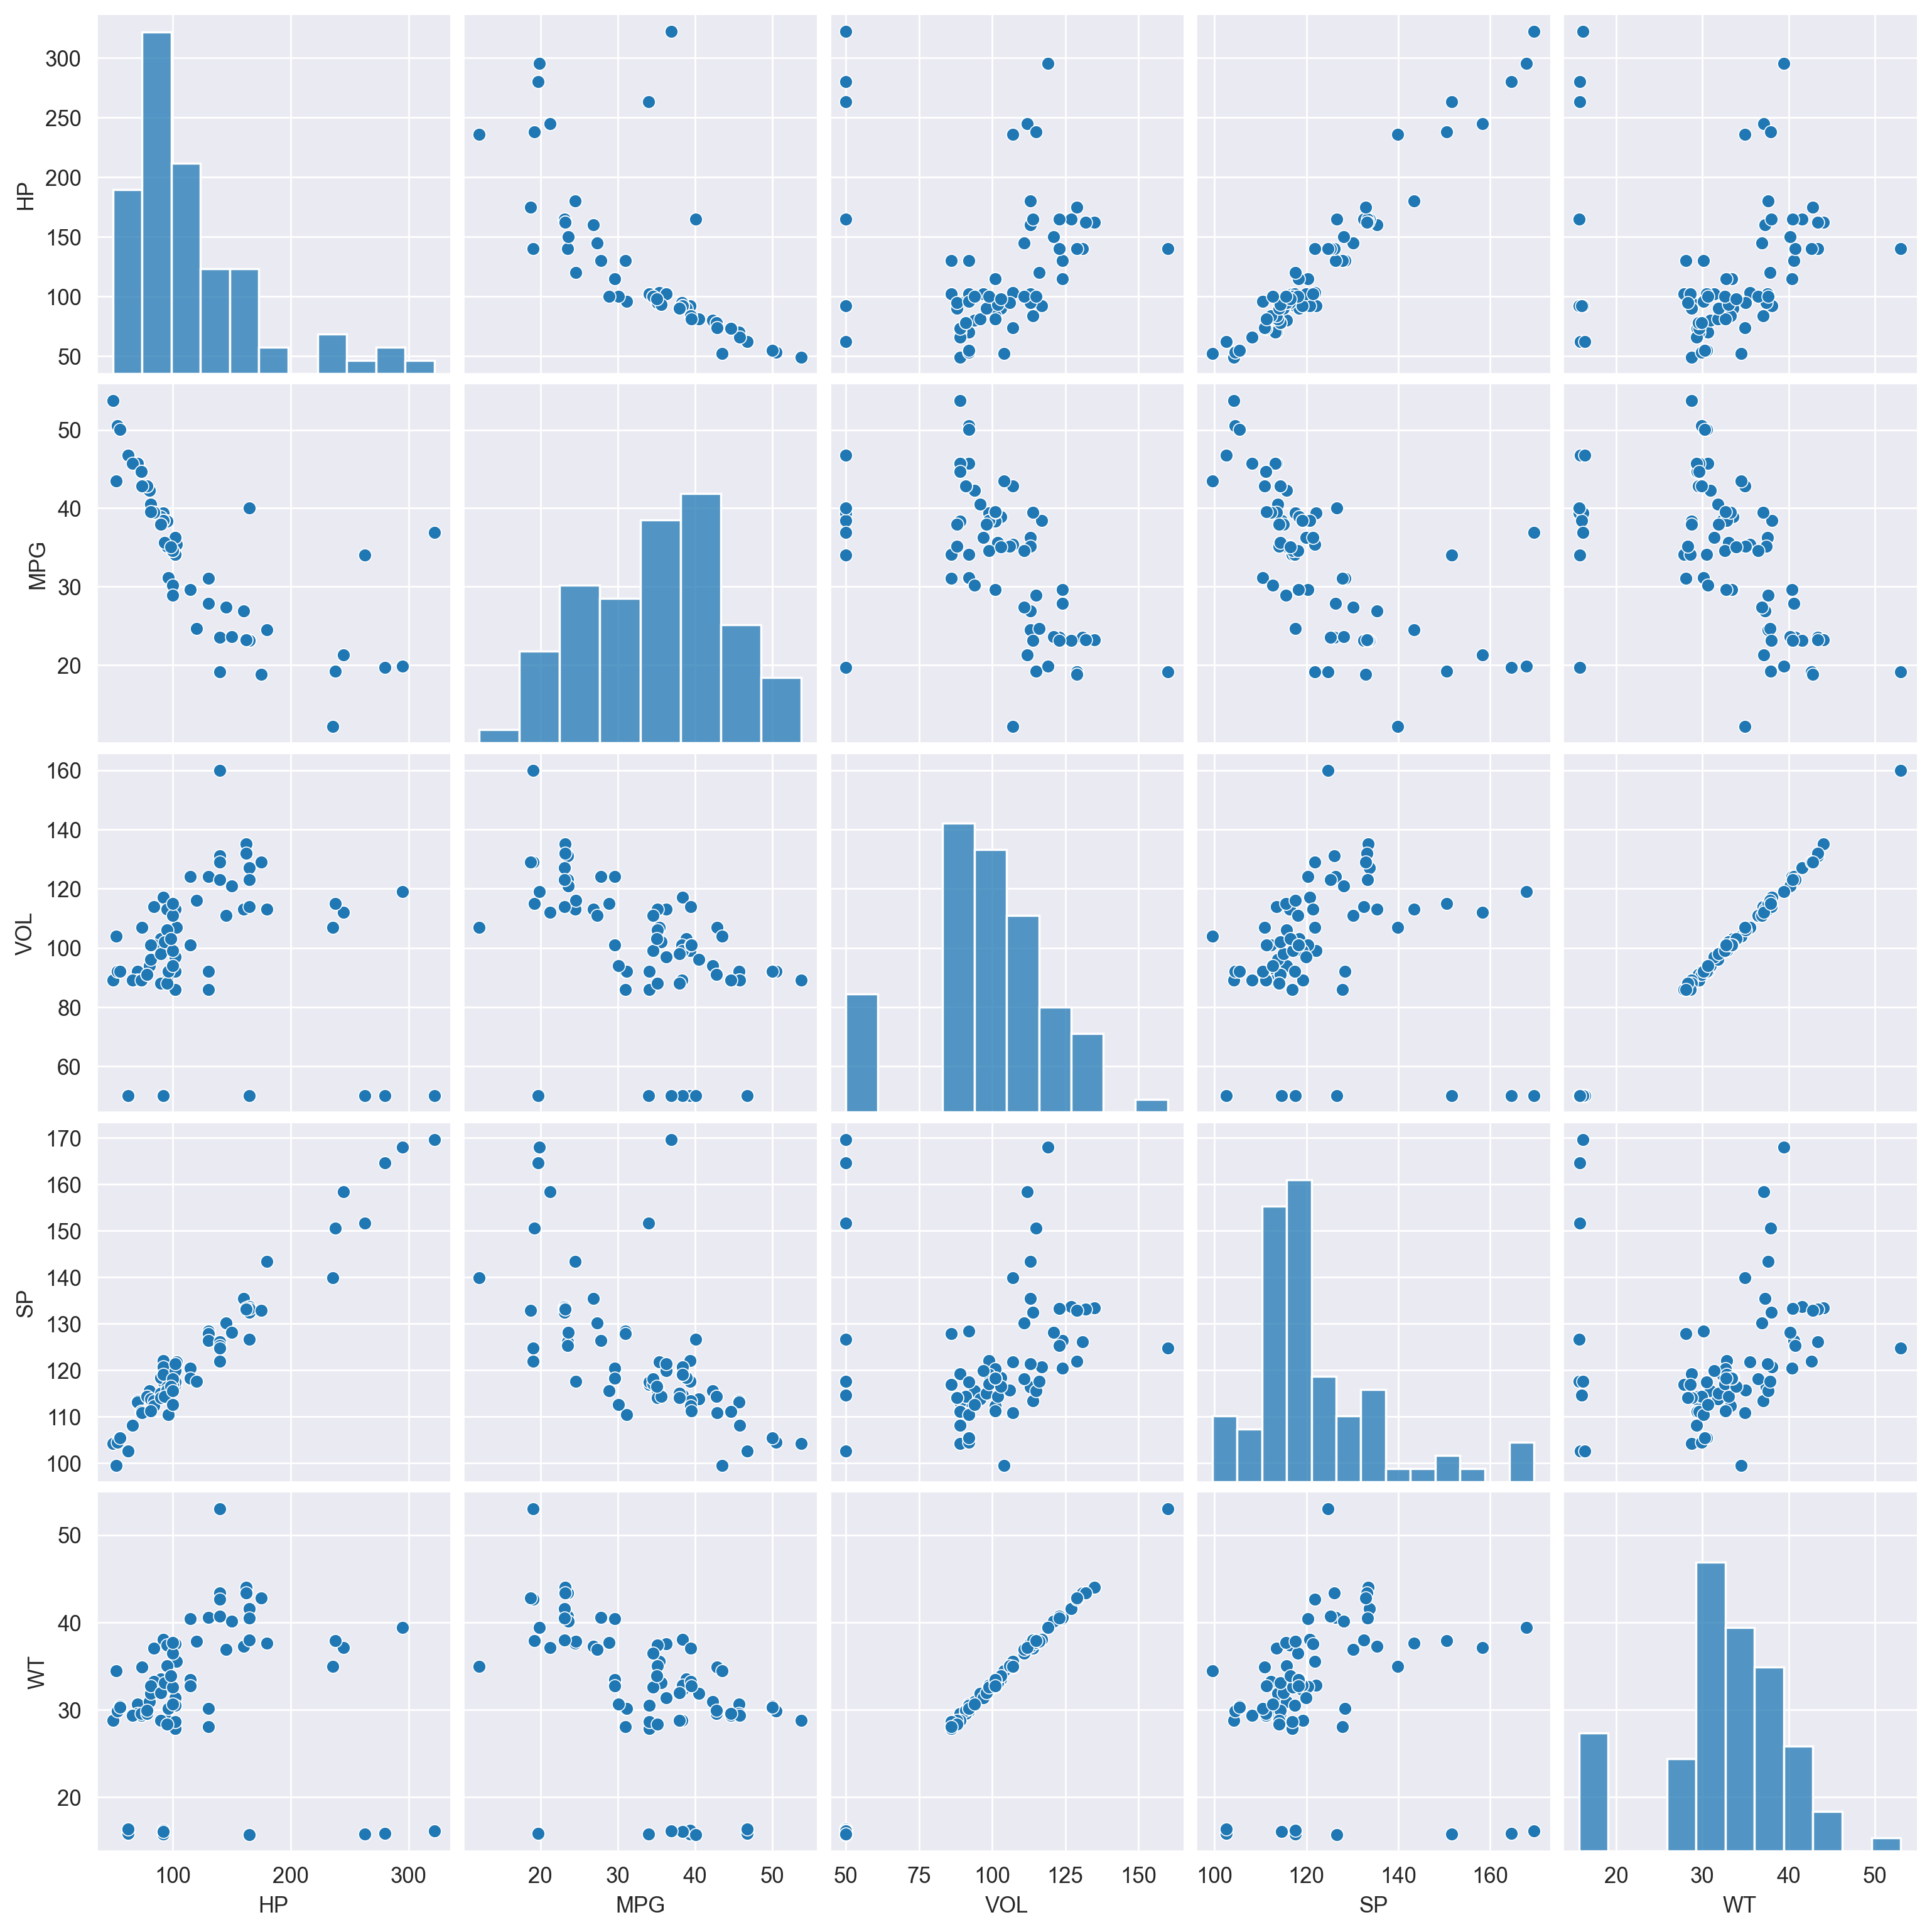

In [4]:
# Data Visualization
sns.pairplot(df)
# Direct relationship is in between WT and VOL.

<Axes: >

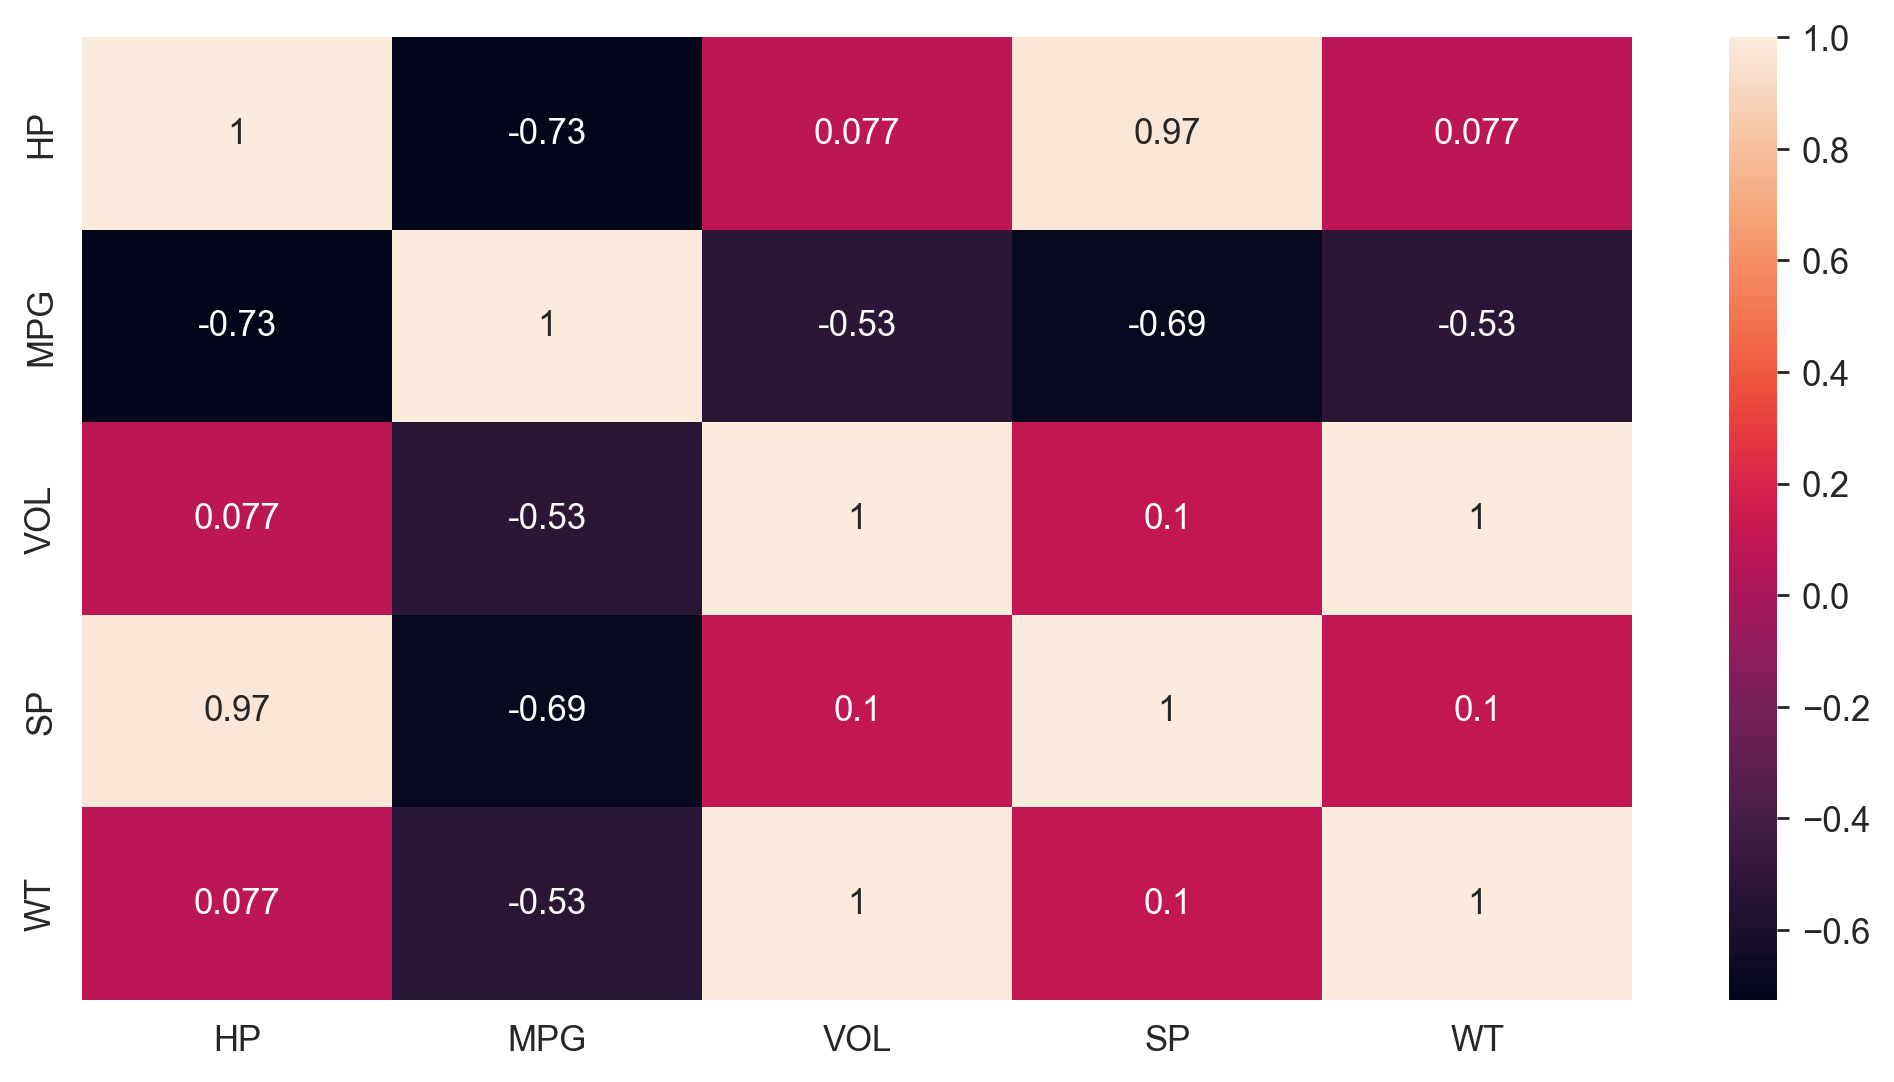

In [5]:
# Confirm correlation with heatmap
sns.heatmap(df.corr(),annot=True)
# same perfect 1 relationship i.e. strong positive relationship is present in WT and VOL

# **Model Building**

In [8]:
model = smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()

In [9]:
model.pvalues
# WT and VOL p-values are greater than alpha, so accept H0
# H0:slope = 0 so columns are not imp, Ha:m !=0 so columns are important
# HP,SP are important and WT,VOL are not important

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

# **Linear Regression**

In [10]:
# Consider WT and exclued VOL
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.pvalues
# all p-values are less than alpha so accept Ha i.e columns are important

Intercept    5.053995e-02
WT           1.914892e-13
HP           7.560276e-07
SP           1.089096e-02
dtype: float64

In [11]:
# Consider VOL and exclued WT
vol = smf.ols('MPG~VOL+HP+SP',data = df).fit()
vol.pvalues
# all p-values are less than alpha so accept Ha i.e columns are important

Intercept    4.194554e-02
VOL          1.648229e-13
HP           8.644870e-07
SP           1.207855e-02
dtype: float64

In [12]:
# Conclusion WT and VOL are important but combinely  they are creating multicollinearity problem

# **Calculate VIF**

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [75]:
data = df.drop(columns=['MPG'])
data
# only for calculating VIF drop mpg column temporarity as it is not required

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
75,175,129,132.864163,42.778219
76,238,115,150.576579,37.923113
77,263,50,151.598513,15.769625
78,295,119,167.944460,39.423099


In [76]:
# VIF = 1/1-rsquared for each variable.
# for VIF of VOL, consider VOL~HP+Sp+WT, calculate Rsquare and find VIF of VOL
# for VIF of HP, HP~VOL+WT+SP, Calculate Rsquare and VIF of HP and so on

In [77]:
list1 = []
for i in range(1,11):
  list1.append(i*2)


In [78]:
list1

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [79]:
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
75,175,129,132.864163,42.778219
76,238,115,150.576579,37.923113
77,263,50,151.598513,15.769625
78,295,119,167.944460,39.423099


In [80]:
data.values

array([[ 49.        ,  89.        , 104.1853528 ,  28.7620589 ],
       [ 55.        ,  92.        , 105.4612635 ,  30.46683298],
       [ 55.        ,  92.        , 105.4612635 ,  30.19359657],
       [ 70.        ,  92.        , 113.4612635 ,  30.63211391],
       [ 53.        ,  92.        , 104.4612635 ,  29.88914864],
       [ 70.        ,  89.        , 113.1853528 ,  29.59176832],
       [ 55.        ,  92.        , 105.4612635 ,  30.30847957],
       [ 62.        ,  50.        , 102.5985128 ,  15.84775807],
       [ 62.        ,  50.        , 102.5985128 ,  16.35948352],
       [ 80.        ,  94.        , 115.6452041 ,  30.92015417],
       [ 73.        ,  89.        , 111.1853528 ,  29.36334142],
       [ 92.        ,  50.        , 117.5985128 ,  15.75353468],
       [ 92.        ,  99.        , 122.1050553 ,  32.81359241],
       [ 73.        ,  89.        , 111.1853528 ,  29.3784363 ],
       [ 66.        ,  89.        , 108.1853528 ,  29.34727902],
       [ 73.        ,  89

In [81]:
vif = pd.DataFrame()
vif

""


In [82]:
vif['Features'] = data.columns
vif

,Features
0,HP
1,VOL
2,SP
3,WT


In [83]:
range(len(data.columns)) # 4 columns 0 to 3

range(0, 4)

In [84]:
[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

[11.12603236659816, 12711.50760375192, 50.00420577085325, 12161.06313871902]

In [85]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
# in range i will iterate through every column one by one

In [86]:
vif
# check highest VIF values: VOL
# closest VIF value to highest is WT
# Very high vif values so they are creating multicollinearity problem

,Features,VIF
0,HP,11.126032
1,VOL,12711.507604
2,SP,50.004206
3,WT,12161.063139


# **Subset Selection**
AIC value

In [87]:
# Consider WT and exclude VOL
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.rsquared, wt.aic

(0.8188936439157302, 452.1377350527963)

In [88]:
# Consider VOL and exclude WT
vol = smf.ols('MPG~VOL+HP+SP',data = df).fit()
vol.rsquared, vol.aic

# r square for VOL is high and low aic value for VOL so consider VOL column and drop WT column

(0.8192122305013384, 451.9968820704961)

# **Model Validation Techniques**



*   Residuals: error = actual - predicted value. No pattern should be there
*   Error vs each x variable

*   Error vs predicted
*   Q-Q plot to check whether data is following normal distribution or not





# **1. Residual Analysis**

In [89]:
# As per the subset selection, it is clear that VOL is more imp. than WT as its Rsquare is more
# and AIC is less. So we will select VOL and drop WT column.

# NORMALITY TEST

In [90]:
# create final model
model = smf.ols('MPG~HP+VOL+SP',data=df).fit()
model.rsquared # not a good accuracy only 77%

0.8192122305013385

In [91]:
import statsmodels.api as sm #for Q-Q plot function for error vs predicted

In [92]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [93]:
model.fittedvalues # predicted values
# for MPG check 1st record: its 53.70 in above output
# In below predicted values for 1st record predicted value is 43.59
# So error is 53-43 = 10


0     44.222122
1     42.869122
2     42.869122
3     42.766593
4     42.910283
        ...    
75    20.561966
76    15.999879
77    21.987849
78     9.544891
79    13.409222
Length: 80, dtype: float64

In [94]:
model.params
# 43 is predicted using equation: y=m1x1+m2x2+m3x3+c
# y=(0.20)+49(HP)+(-0.20)*89(VOL)+0.40*104(SP) + 29 (intercept)
# so y = 43

Intercept    27.755465
HP           -0.226762
VOL          -0.172856
SP            0.412363
dtype: float64

In [95]:
model.resid # erro=actual-predicted value

0      9.478559
1      7.144280
2      7.144280
3      2.929729
4      7.593949
        ...    
75    -1.799129
76     3.198008
77    12.012151
78    10.288842
79    -1.307959
Length: 80, dtype: float64

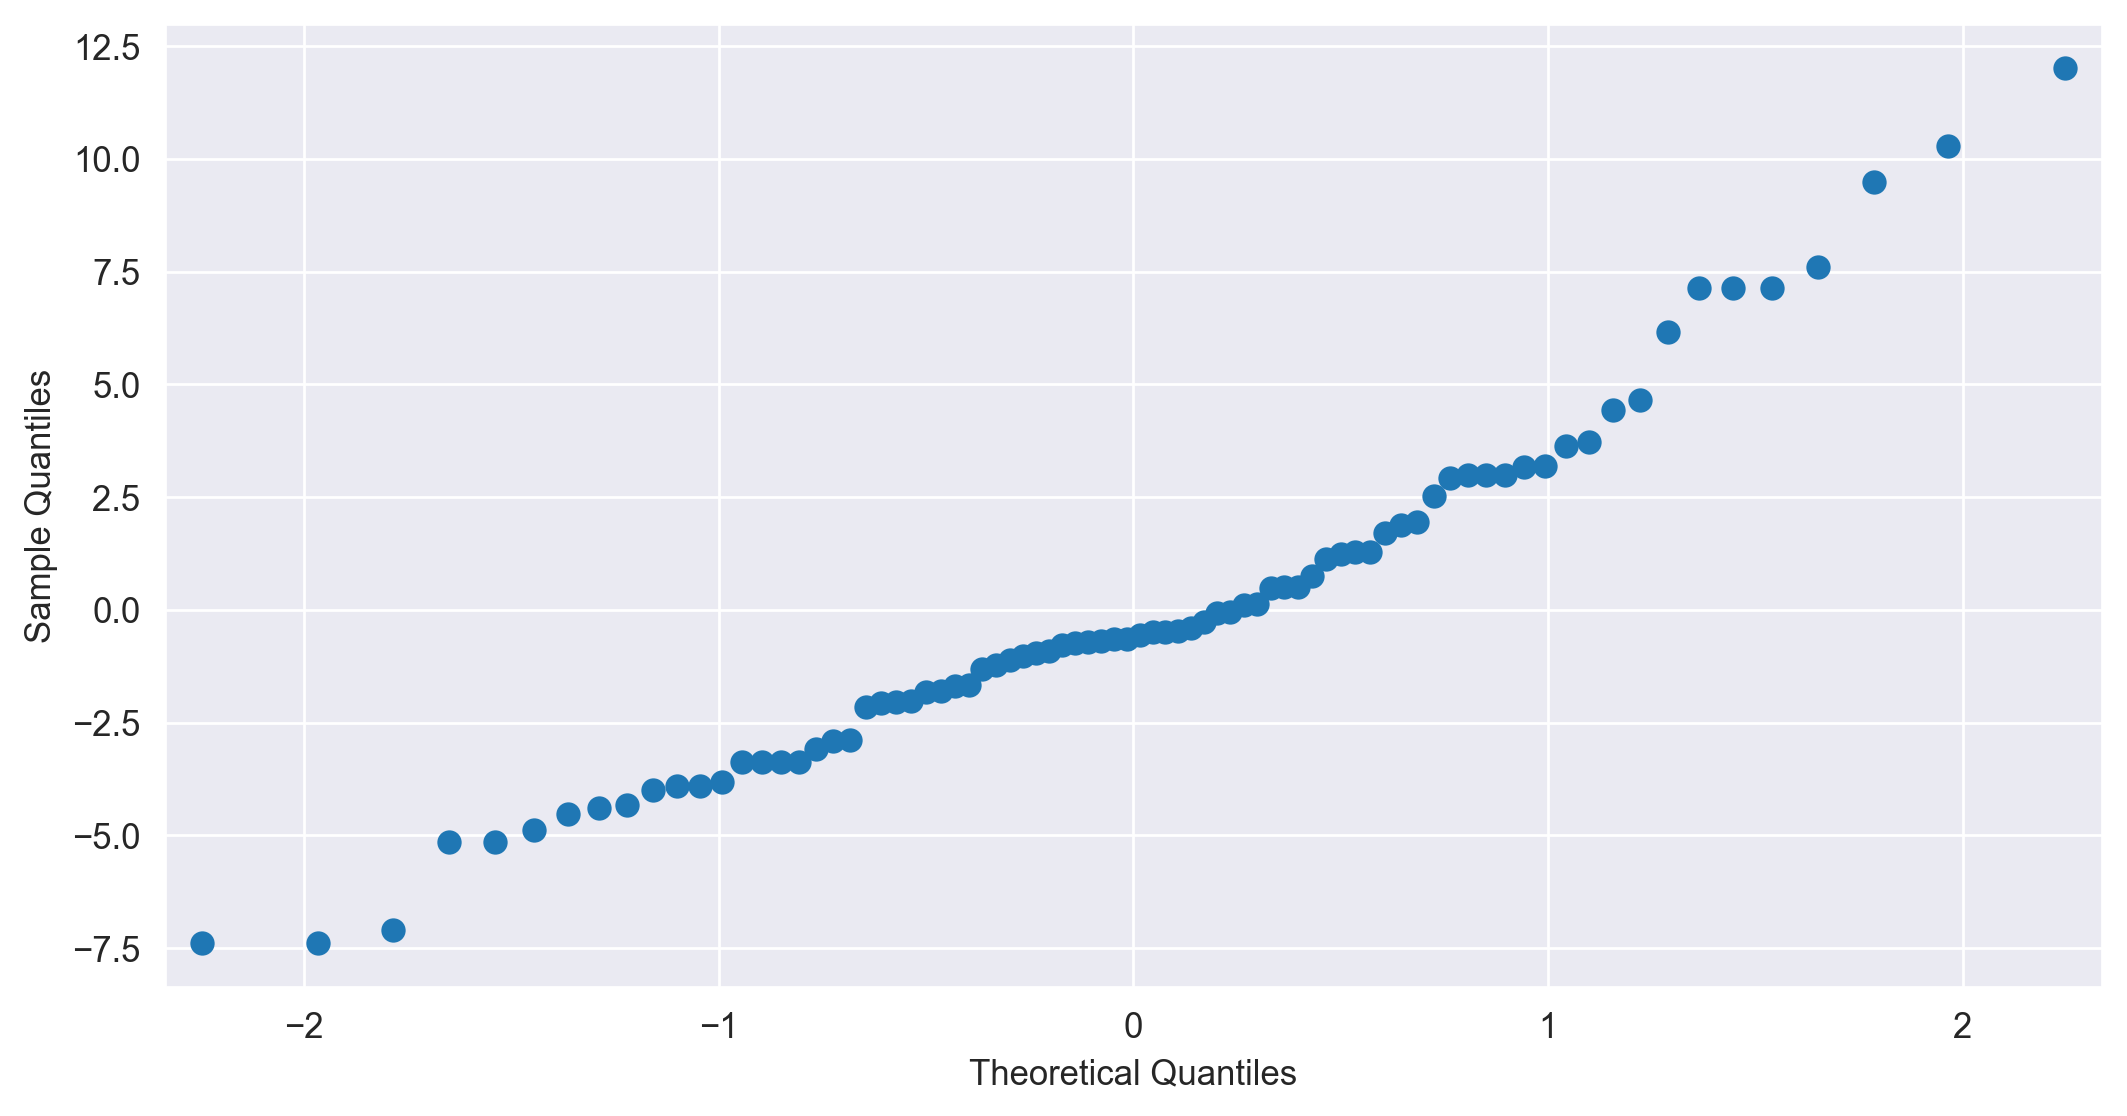

In [96]:
# Q-Q Plot
sm.qqplot(model.resid);

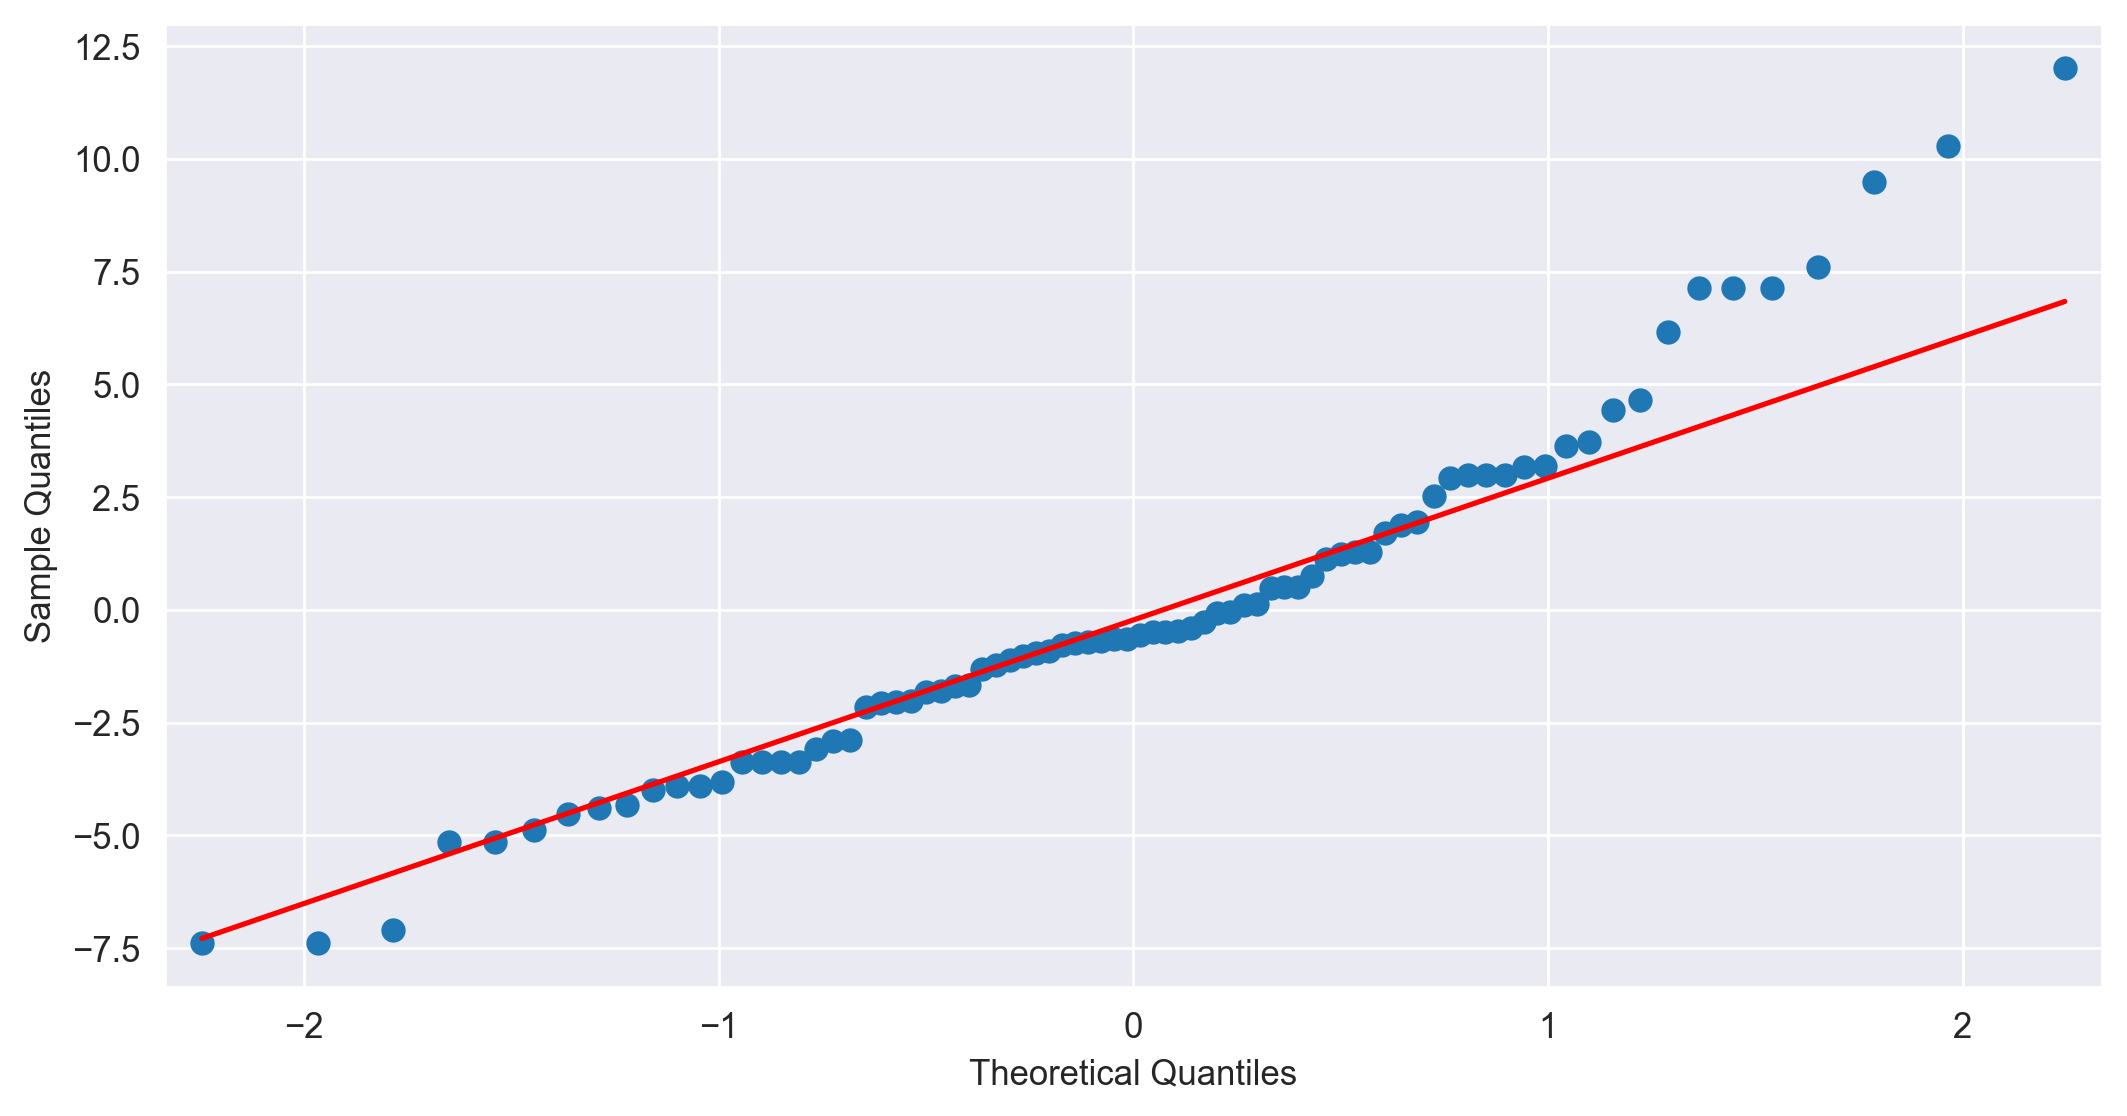

In [97]:
sm.qqplot(model.resid, line='q');
# Data is not following normal distribution

In [98]:
# get index for higher residuals
np.argmax(model.resid),np.max(model.resid)
# argmax() finds max error value and returns its index, max() will return max error

(77, 12.012150730034275)

# **2. Residual plot of Homoscedasticity**
Homoscedasticity can be checked by plotting a scatter plot between fitted (predicted) values and residuals

In [99]:
model.params

Intercept    27.755465
HP           -0.226762
VOL          -0.172856
SP            0.412363
dtype: float64

In [100]:
model.fittedvalues

0     44.222122
1     42.869122
2     42.869122
3     42.766593
4     42.910283
        ...    
75    20.561966
76    15.999879
77    21.987849
78     9.544891
79    13.409222
Length: 80, dtype: float64

In [101]:
model.resid

0      9.478559
1      7.144280
2      7.144280
3      2.929729
4      7.593949
        ...    
75    -1.799129
76     3.198008
77    12.012151
78    10.288842
79    -1.307959
Length: 80, dtype: float64

Text(0, 0.5, 'Errors')

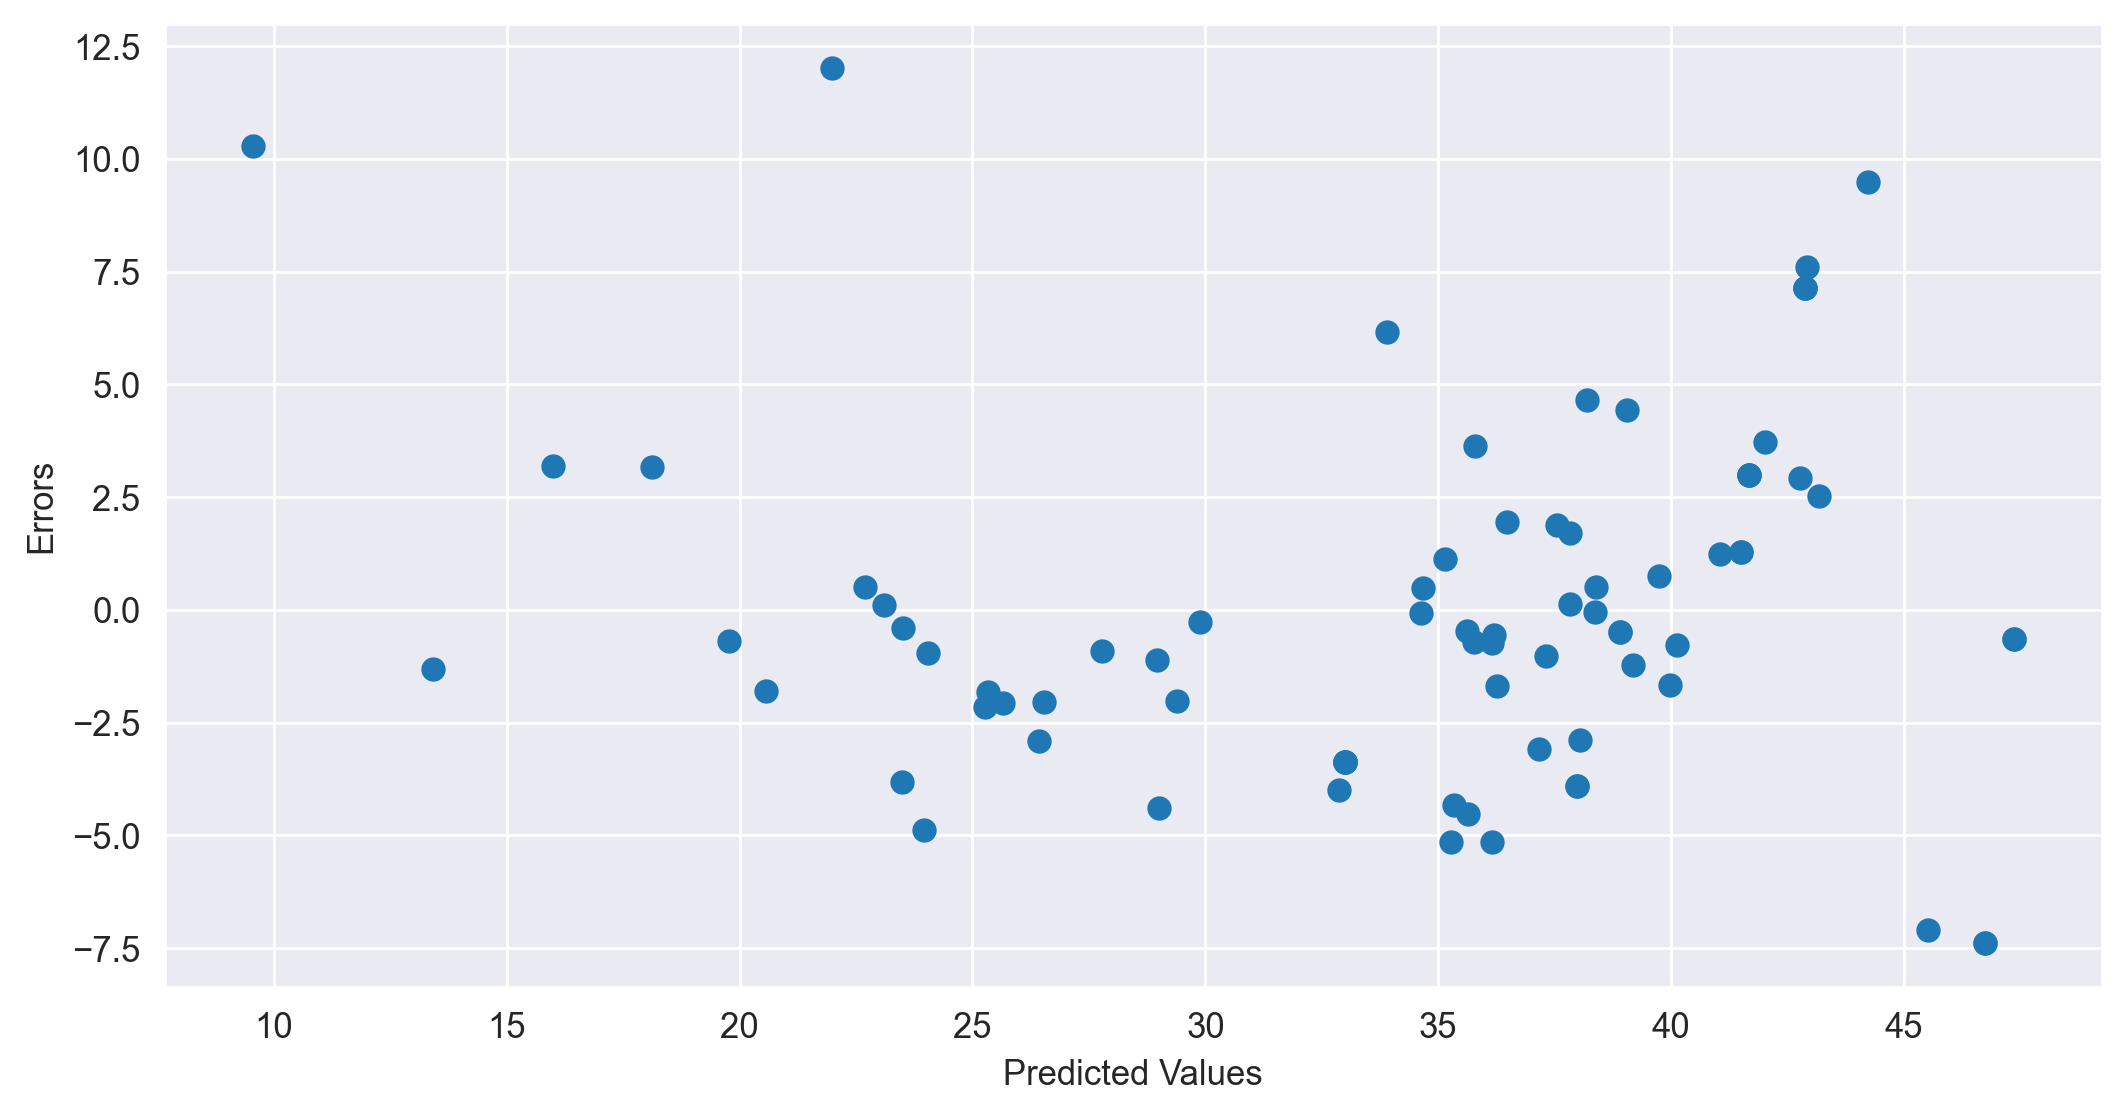

In [102]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
# pattern is there

# **3. Residual Vs. Regressor (x)**

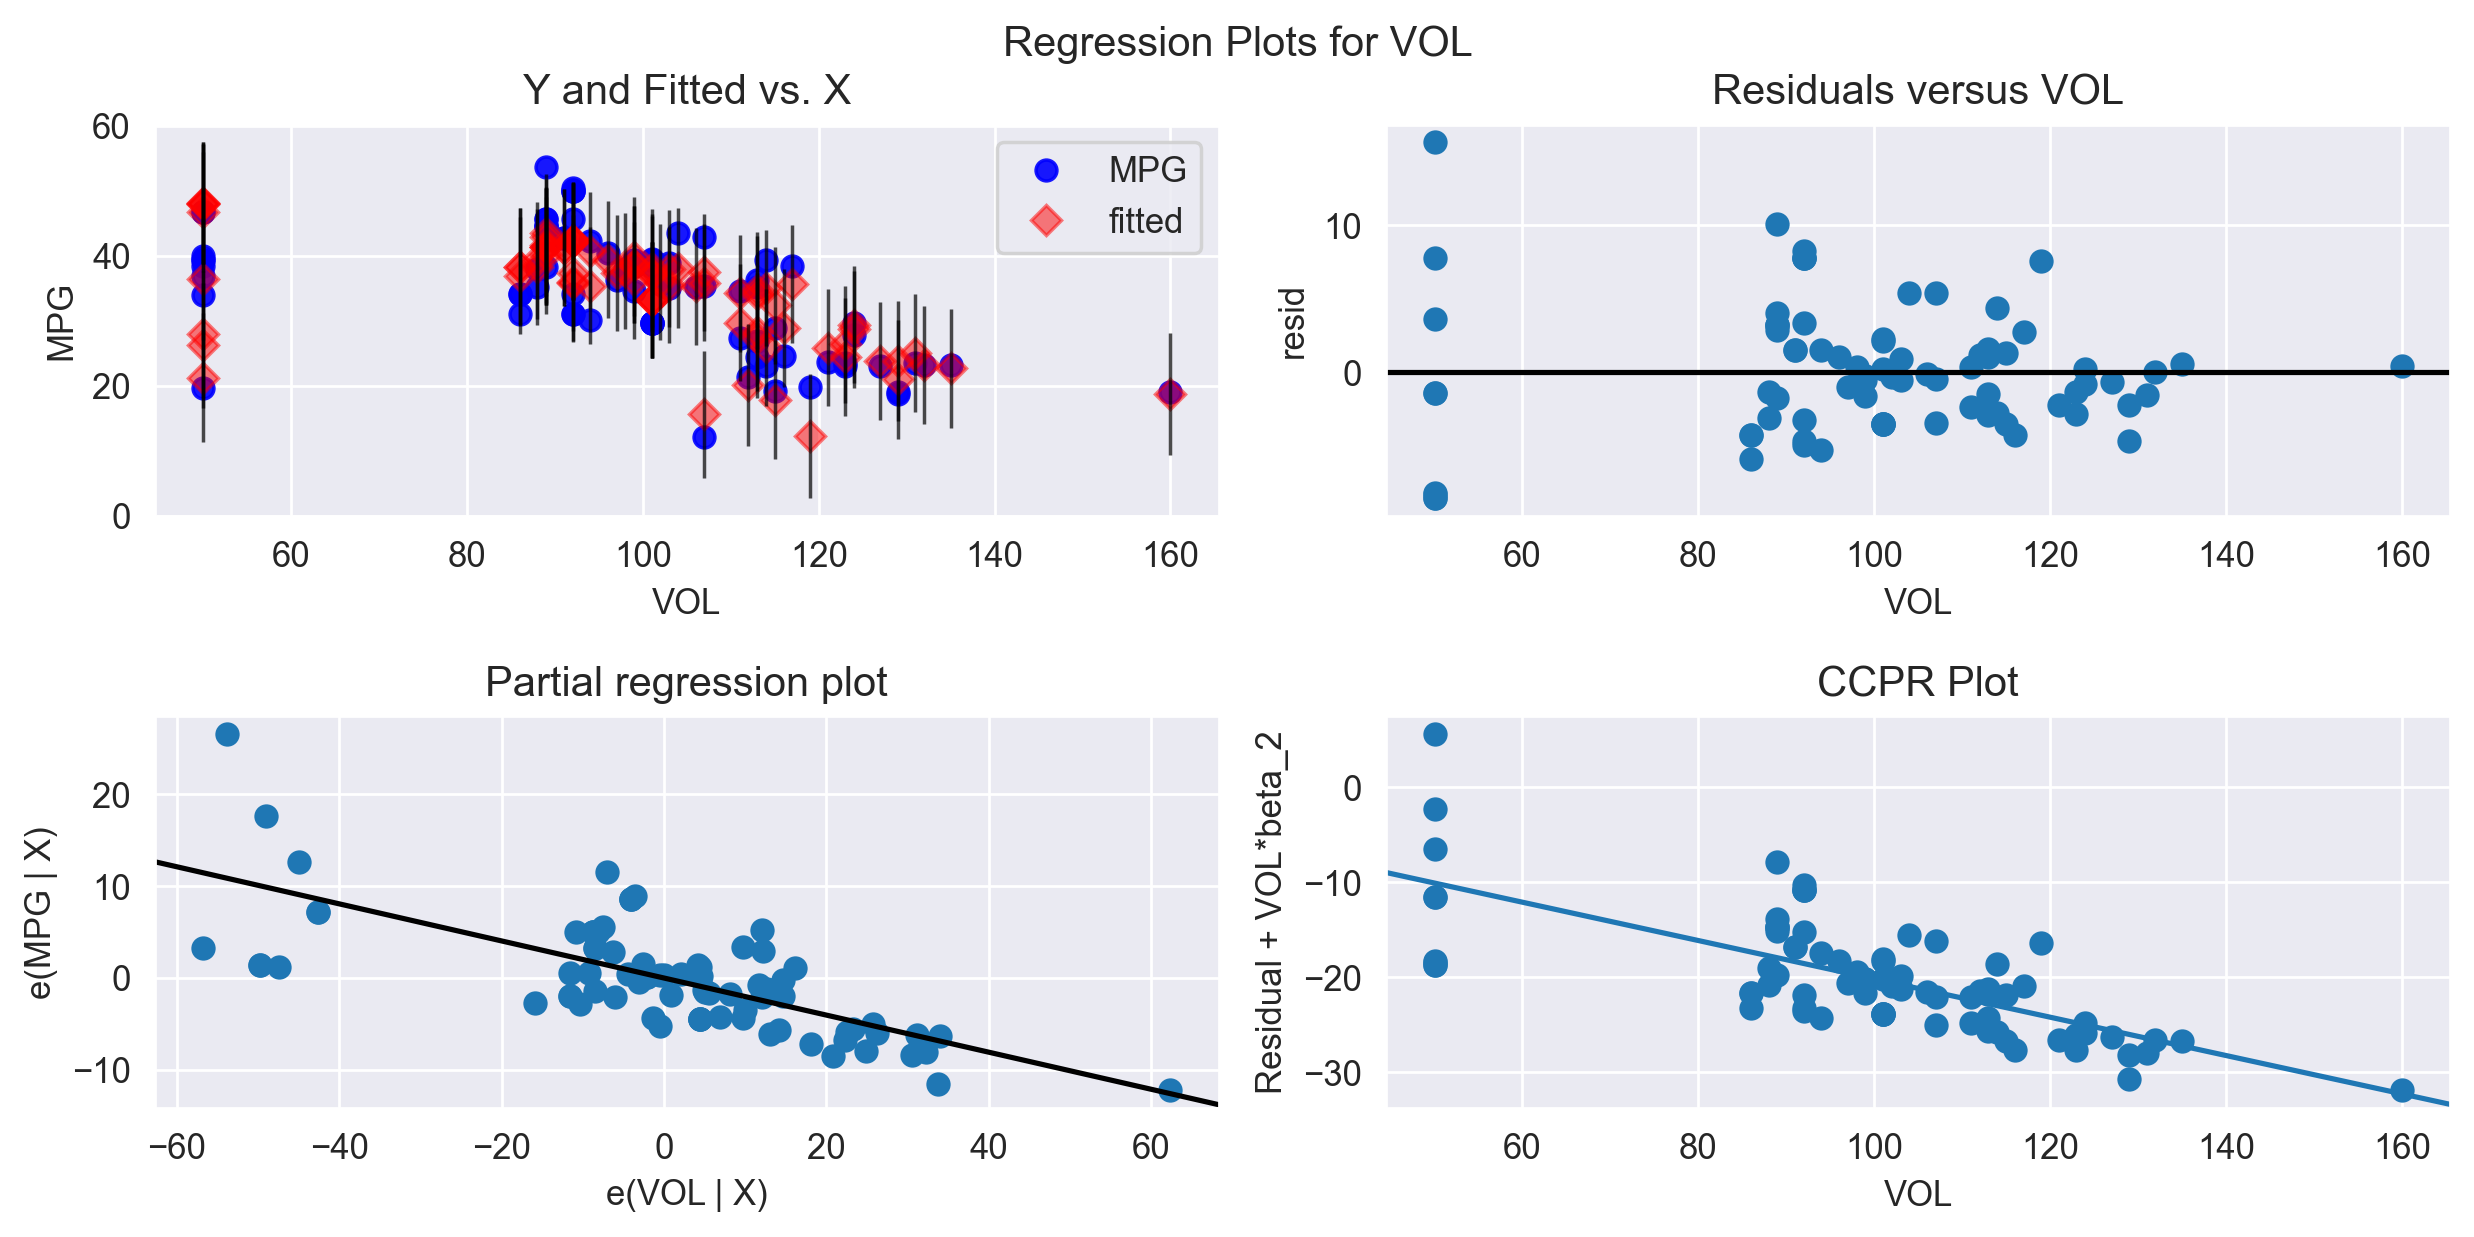

In [43]:
# VOL
sm.graphics.plot_regress_exog(model,'VOL');

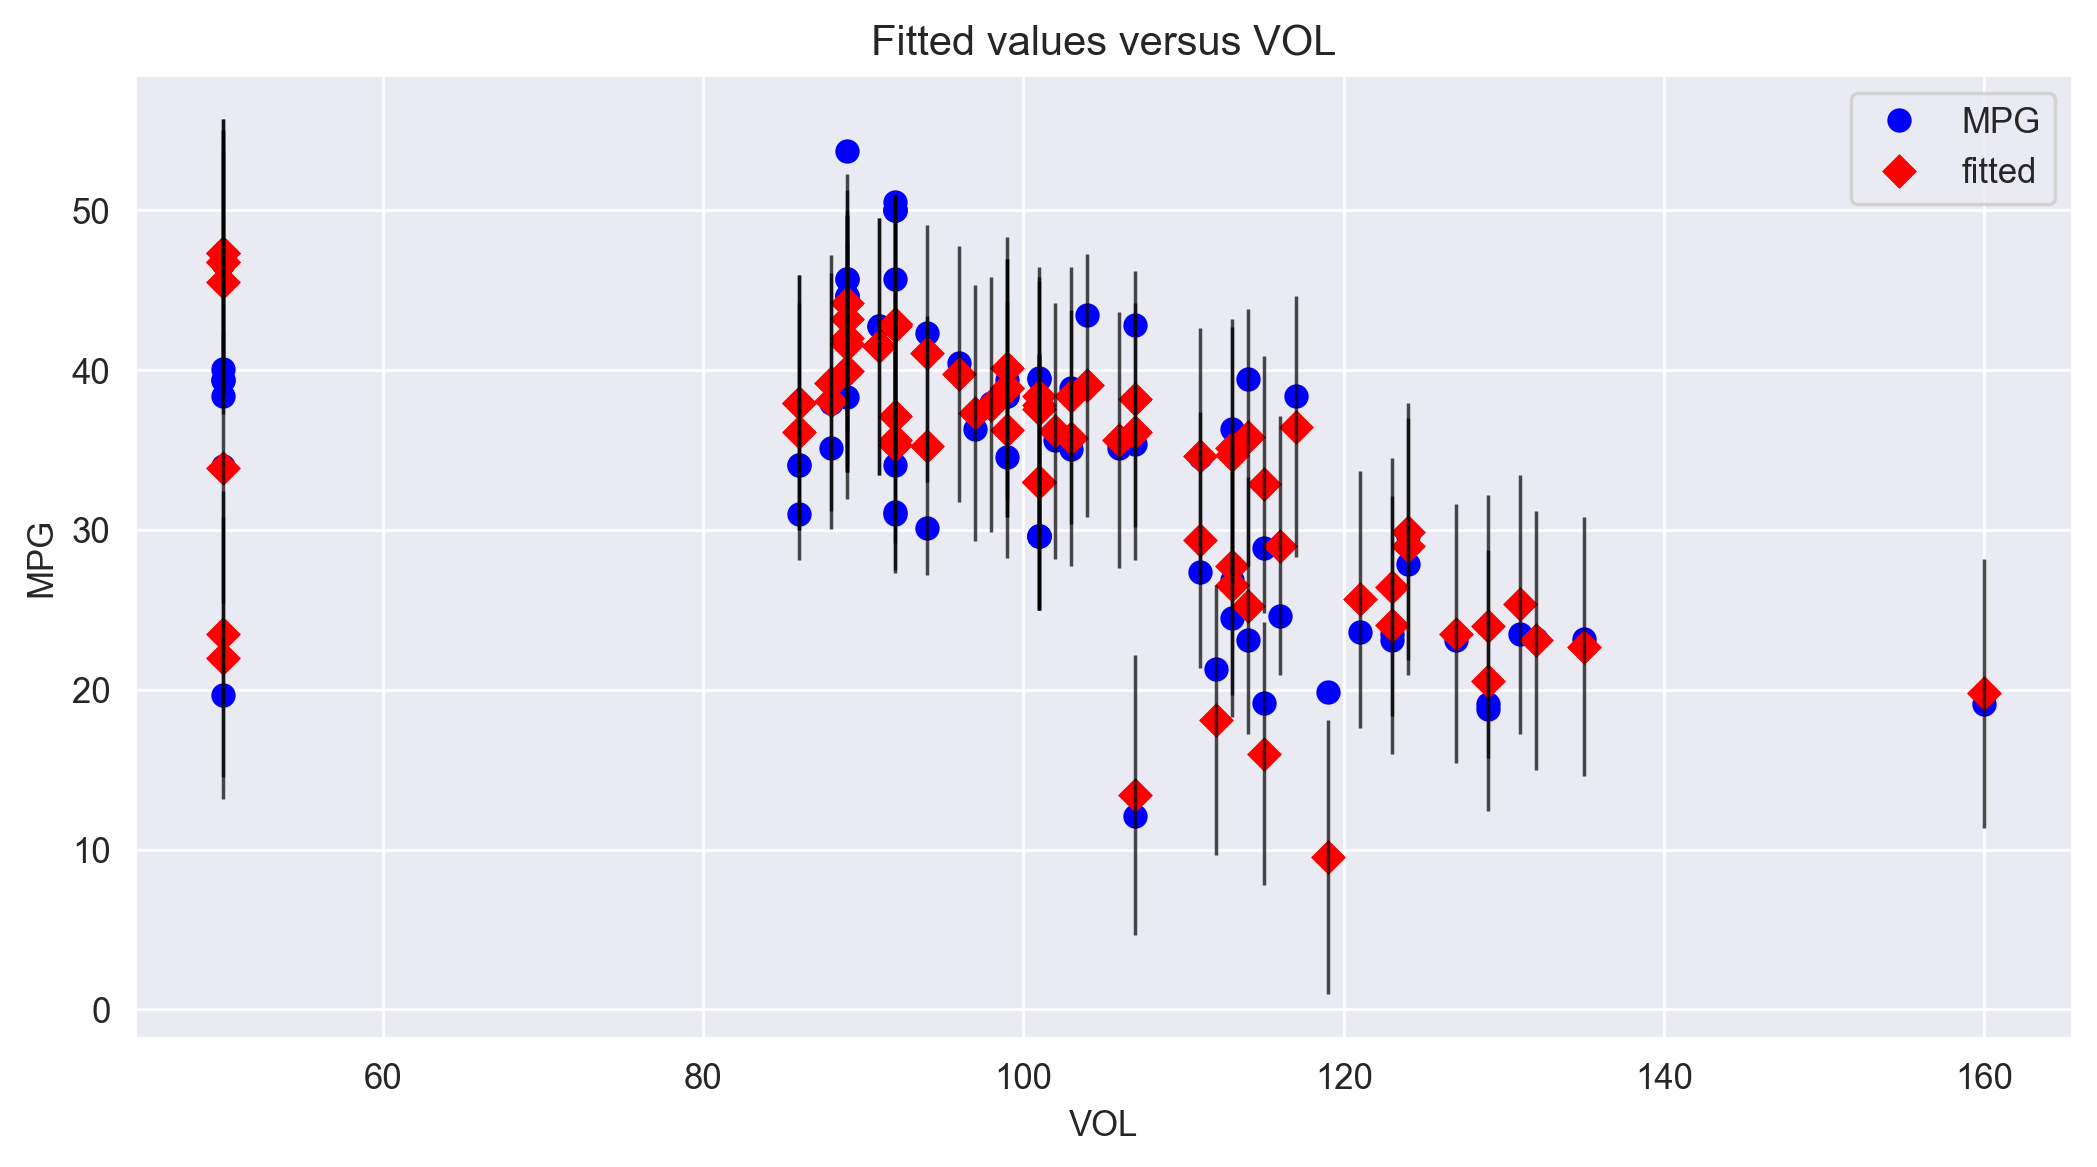

In [103]:
# to plot only 1st graph
sm.graphics.plot_fit(model,'VOL'); # blue: actual values, Red: predicted

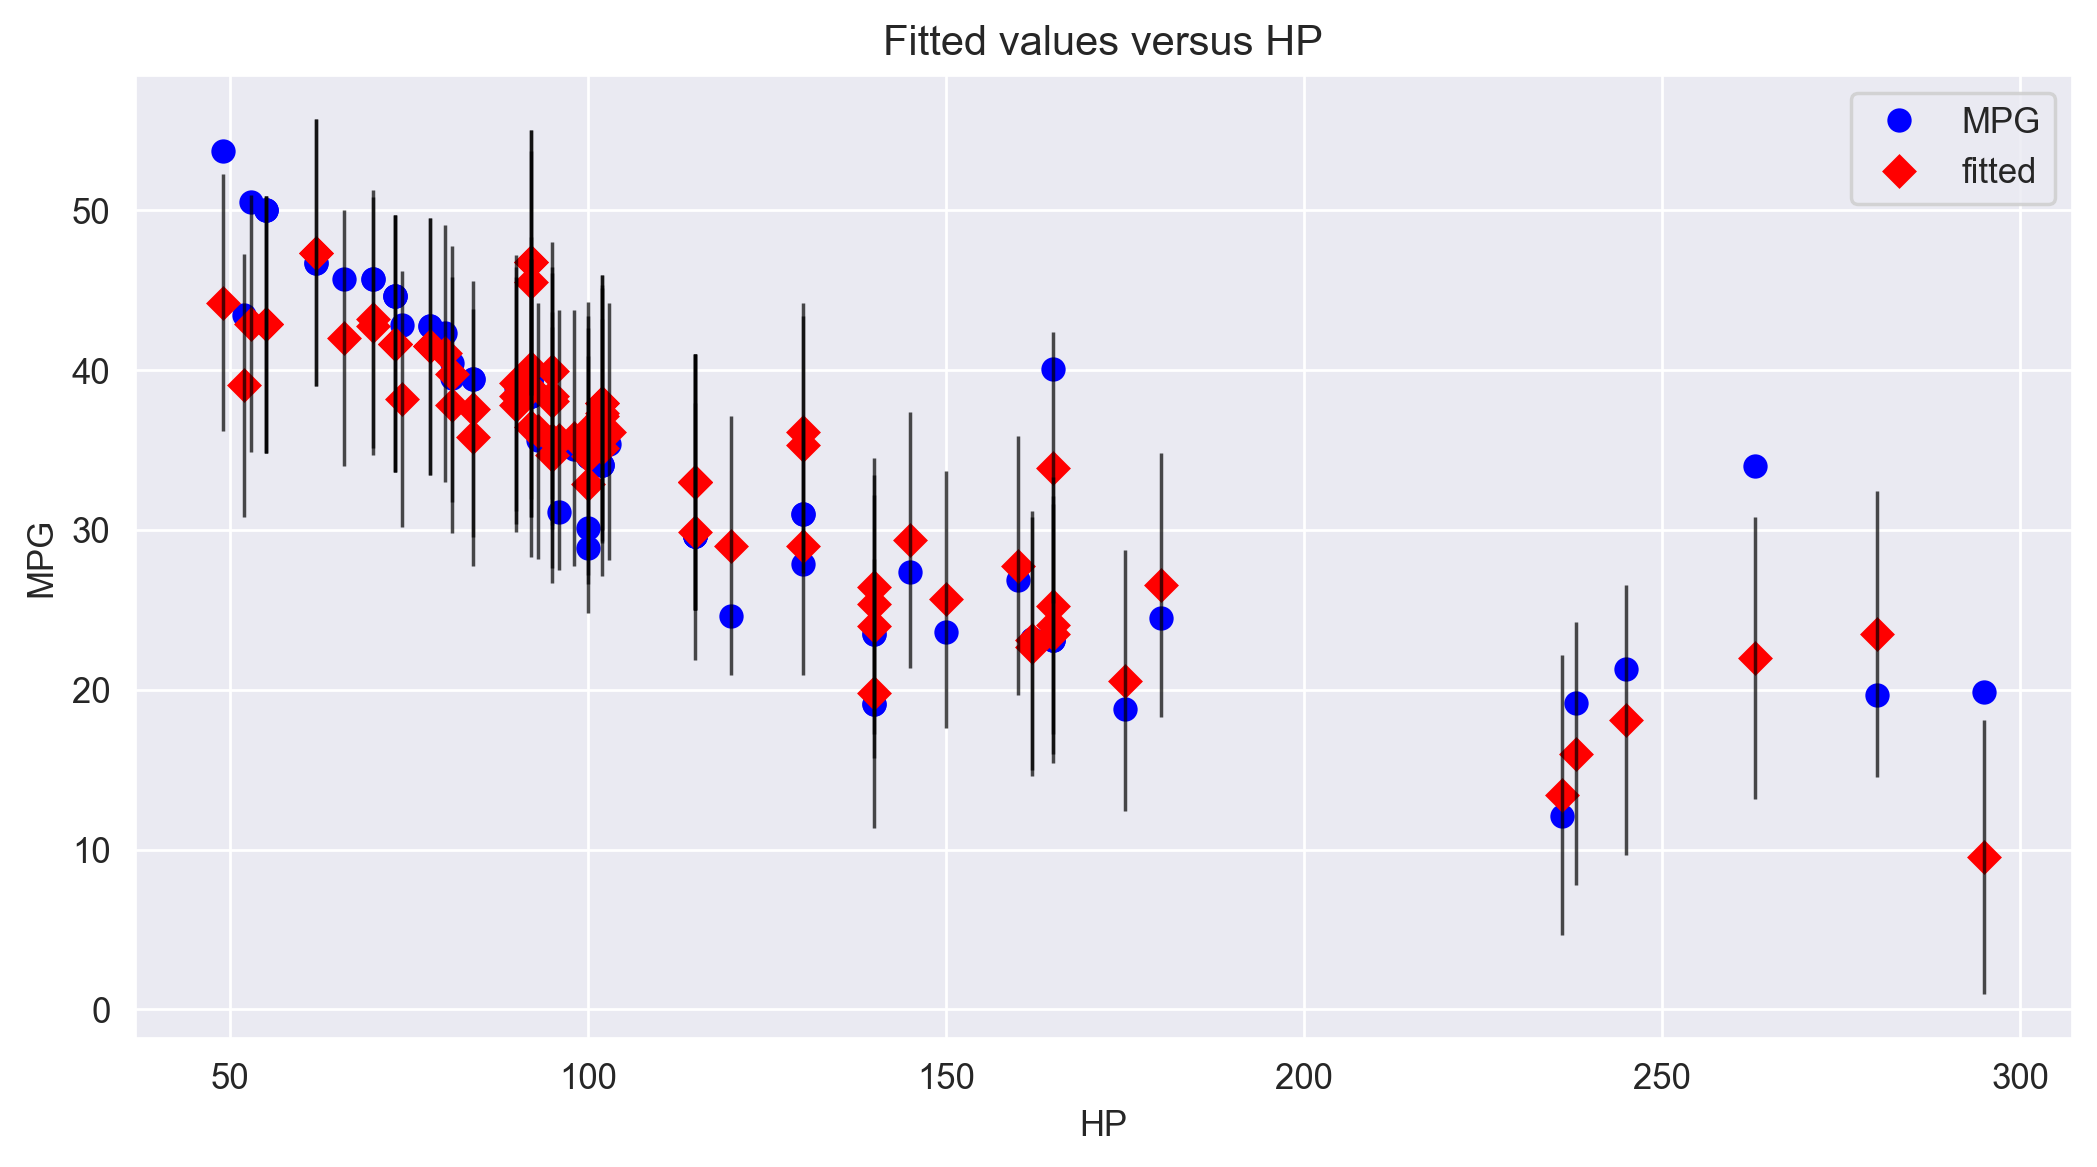

In [104]:
# HP
sm.graphics.plot_fit(model,'HP');

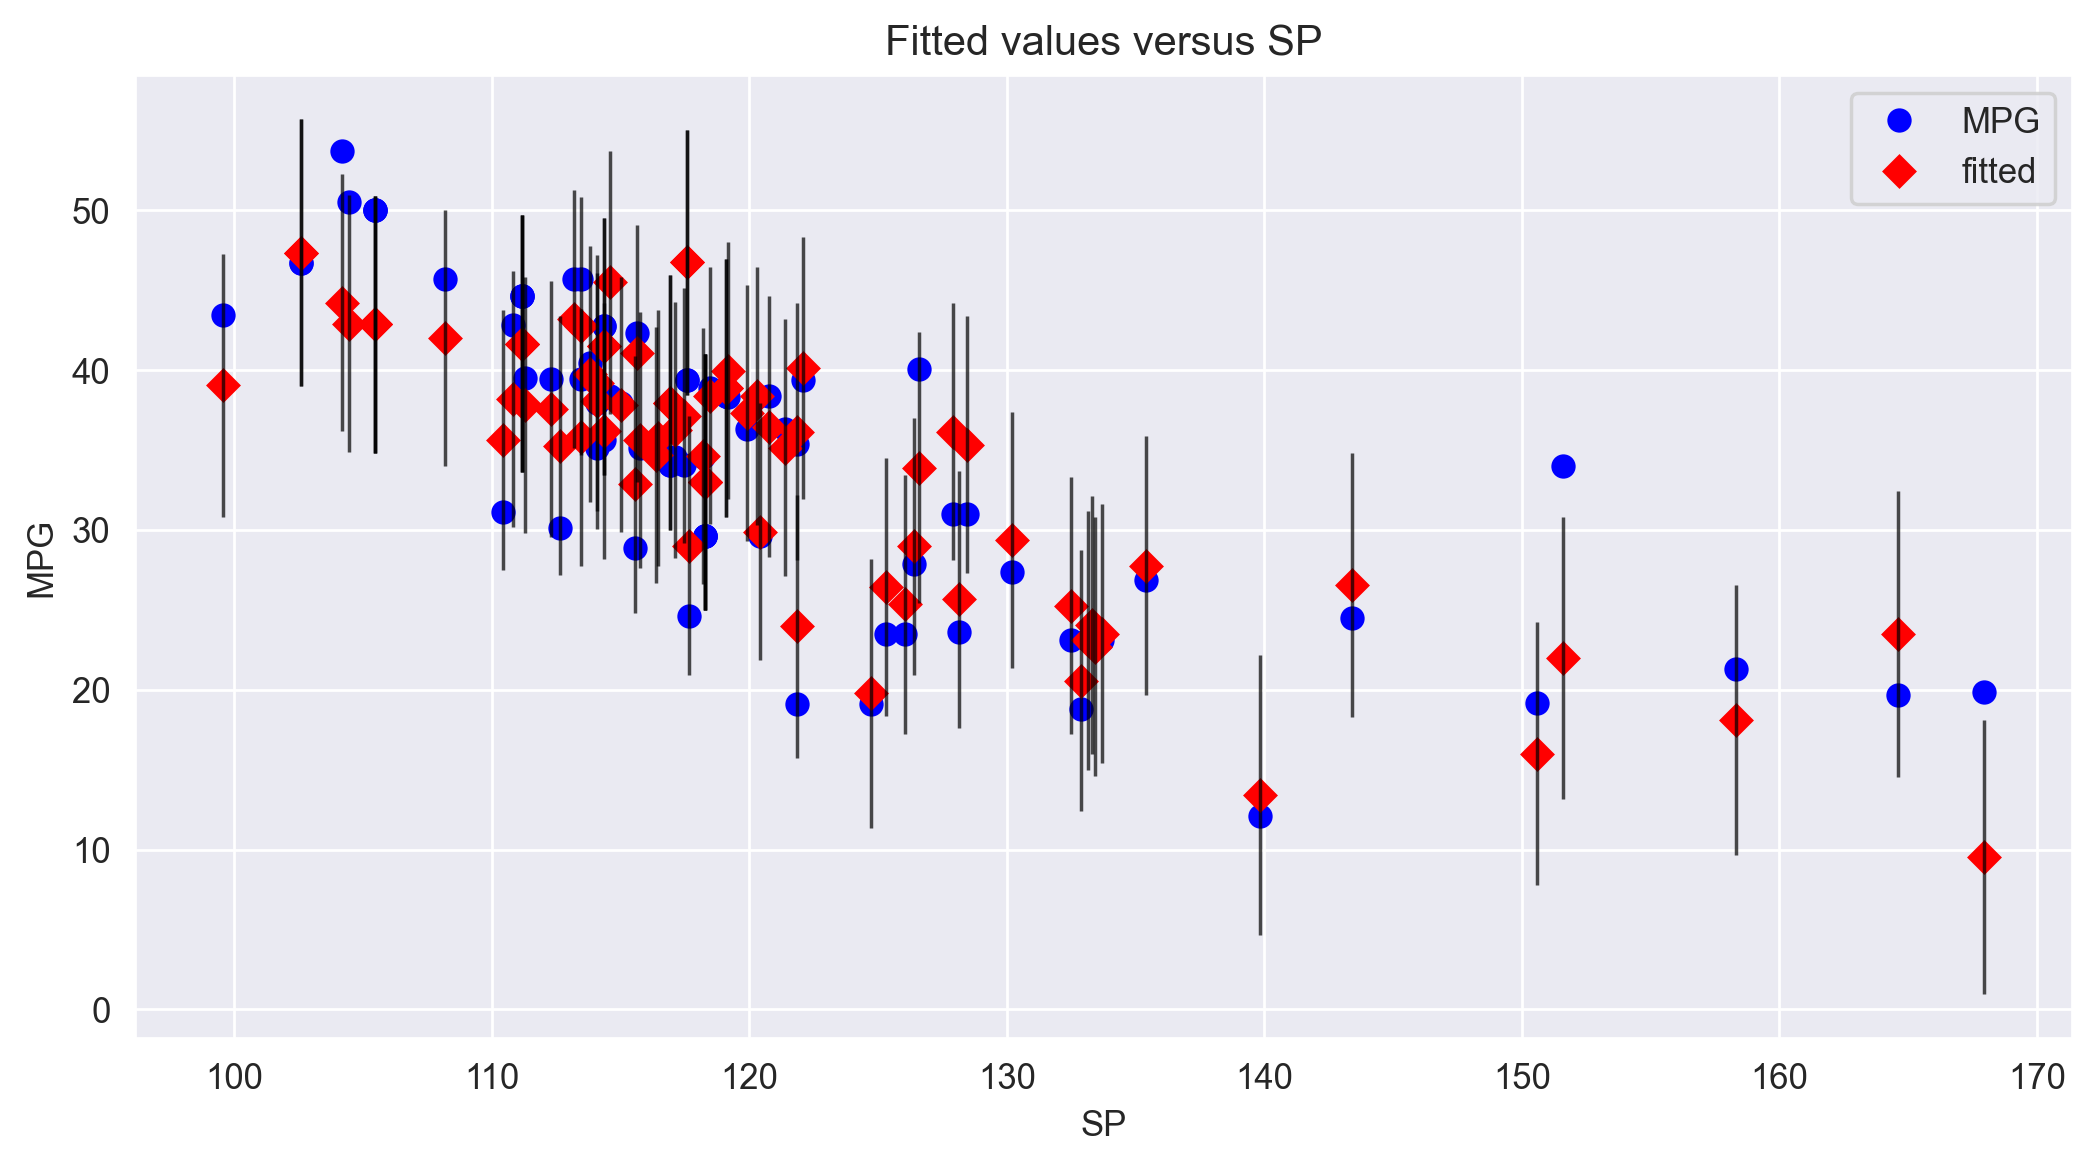

In [105]:
# SP
sm.graphics.plot_fit(model,'SP');

# **MODEL DELETION TECHNIQUES**
Detecting influencers and outliers

In [106]:
model

In [107]:
# find the influence data
inf = model.get_influence() # in statsmodels get_inluence() will do the calculations

In [108]:
# calculate the cook's distance
c,p = inf.cooks_distance # returns 81 cook's distances and 81 p values. Only consider cook's distance

In [109]:
c

array([5.09226374e-02, 2.56771643e-02, 2.56771643e-02, 5.41277886e-03,
       3.16093599e-02, 3.90215825e-03, 2.56771643e-02, 9.02530977e-04,
       9.02530977e-04, 8.08184356e-04, 3.27189323e-03, 9.20102413e-02,
       7.72658639e-04, 3.27189323e-03, 5.79890455e-03, 3.27189323e-03,
       7.51679849e-04, 9.20102413e-02, 7.51679849e-04, 1.33756757e-04,
       1.25357489e-04, 8.43390459e-03, 1.31567497e-06, 1.74994922e-04,
       1.35484299e-03, 7.25485811e-02, 3.81956108e-03, 1.25357489e-04,
       2.95429190e-02, 2.91977510e-04, 5.50460143e-03, 1.10584664e-03,
       3.25161961e-04, 7.16699149e-04, 1.00982859e-03, 3.88171967e-06,
       4.48047137e-04, 4.49131327e-03, 4.49131327e-03, 1.11543428e-02,
       7.76510798e-05, 5.89634396e-05, 2.23706701e-03, 2.91677482e-03,
       8.81125258e-05, 6.33041813e-04, 1.75171731e-06, 1.19170992e-04,
       1.55702626e-02, 4.00872545e-03, 4.00872545e-03, 4.00872545e-03,
       3.56757196e-05, 6.74272453e-03, 5.48645539e-04, 6.46930699e-04,
      

Text(0, 0.5, "Cook's Distance")

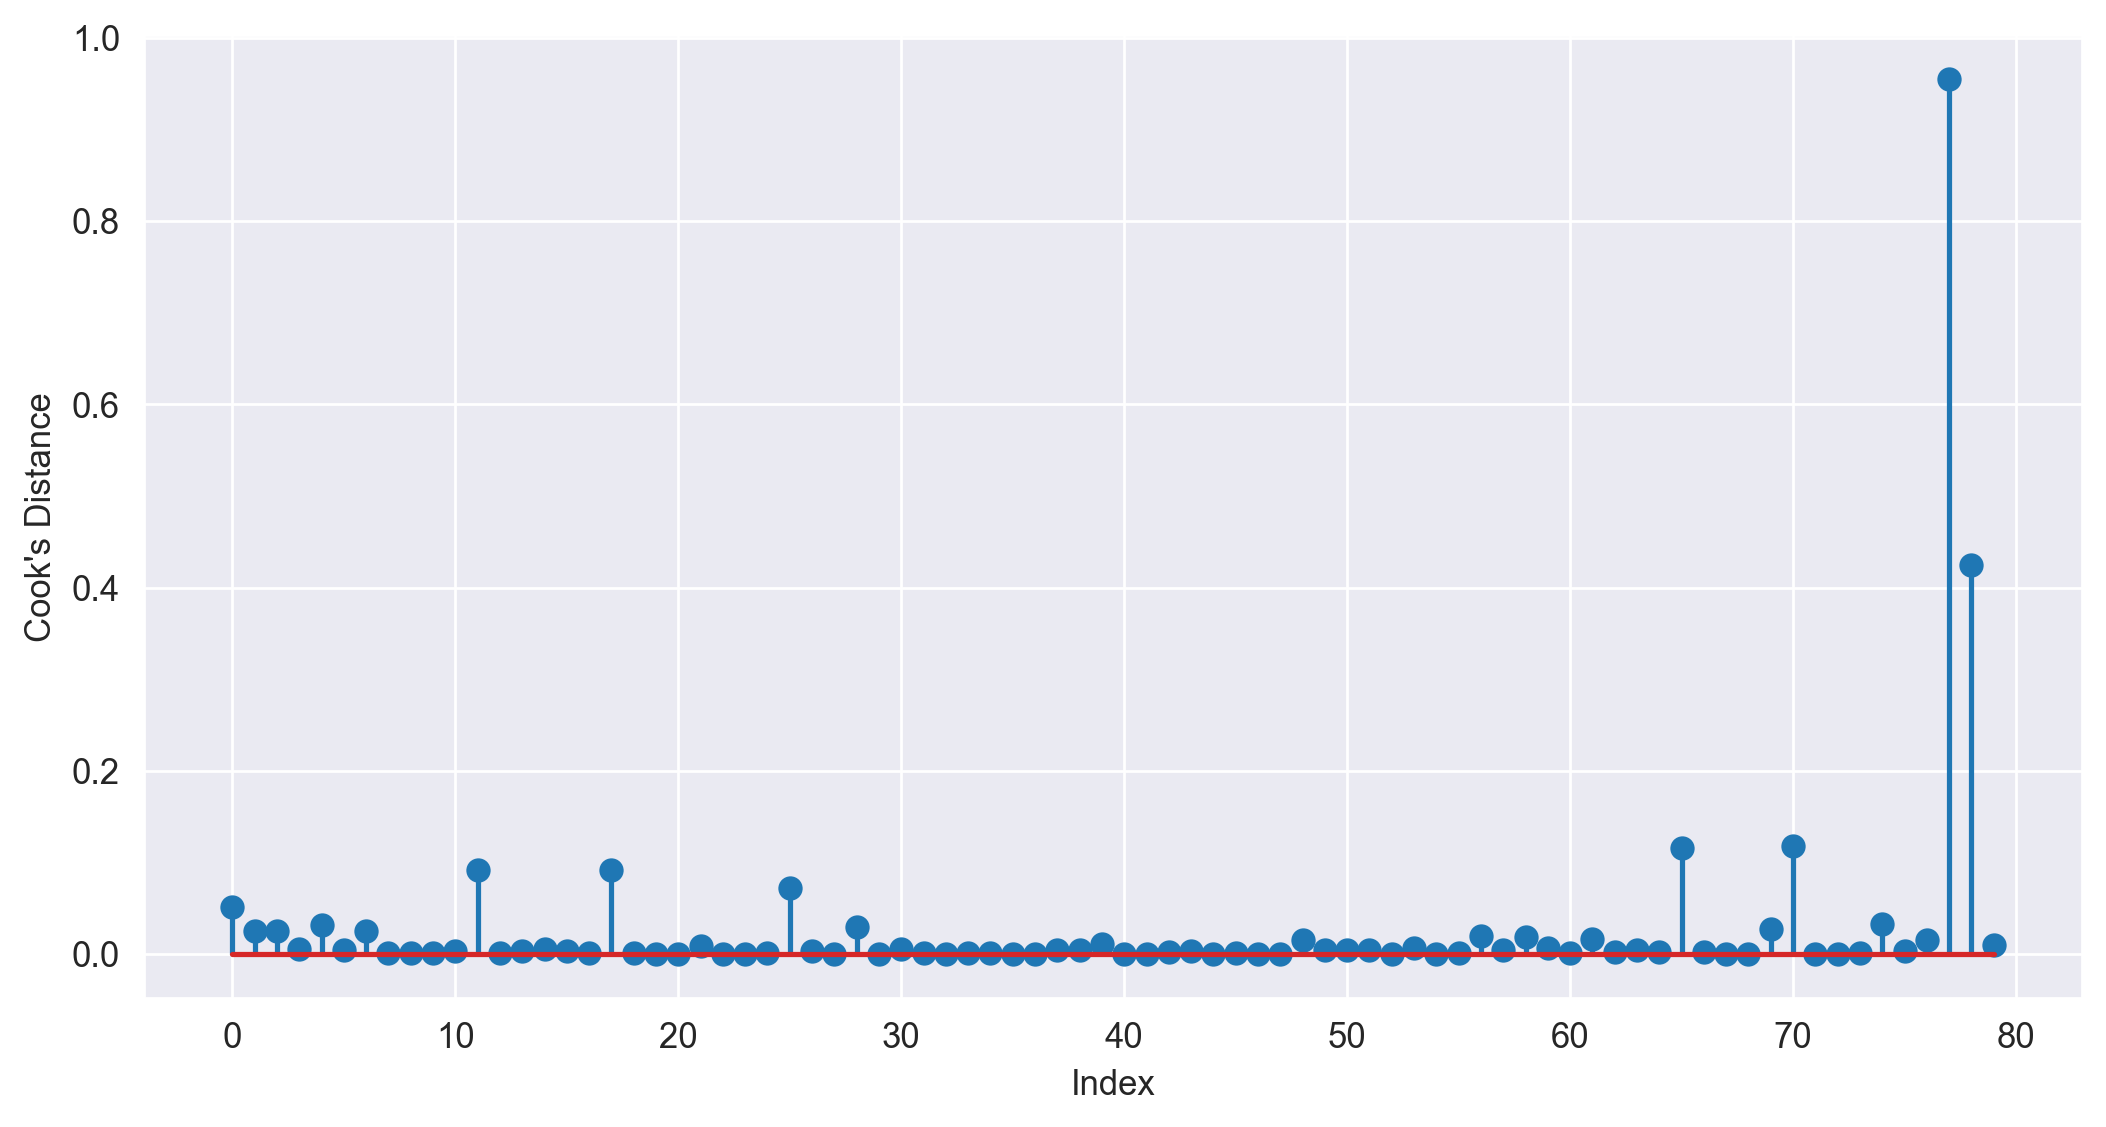

In [110]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')

In [112]:
np.argmax(c), np.max(c) # row 76 is influencer so drop it

(77, 0.9548691936312576)

In [113]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,238,19.197888,115,150.576579,37.923113


In [114]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [115]:
# Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

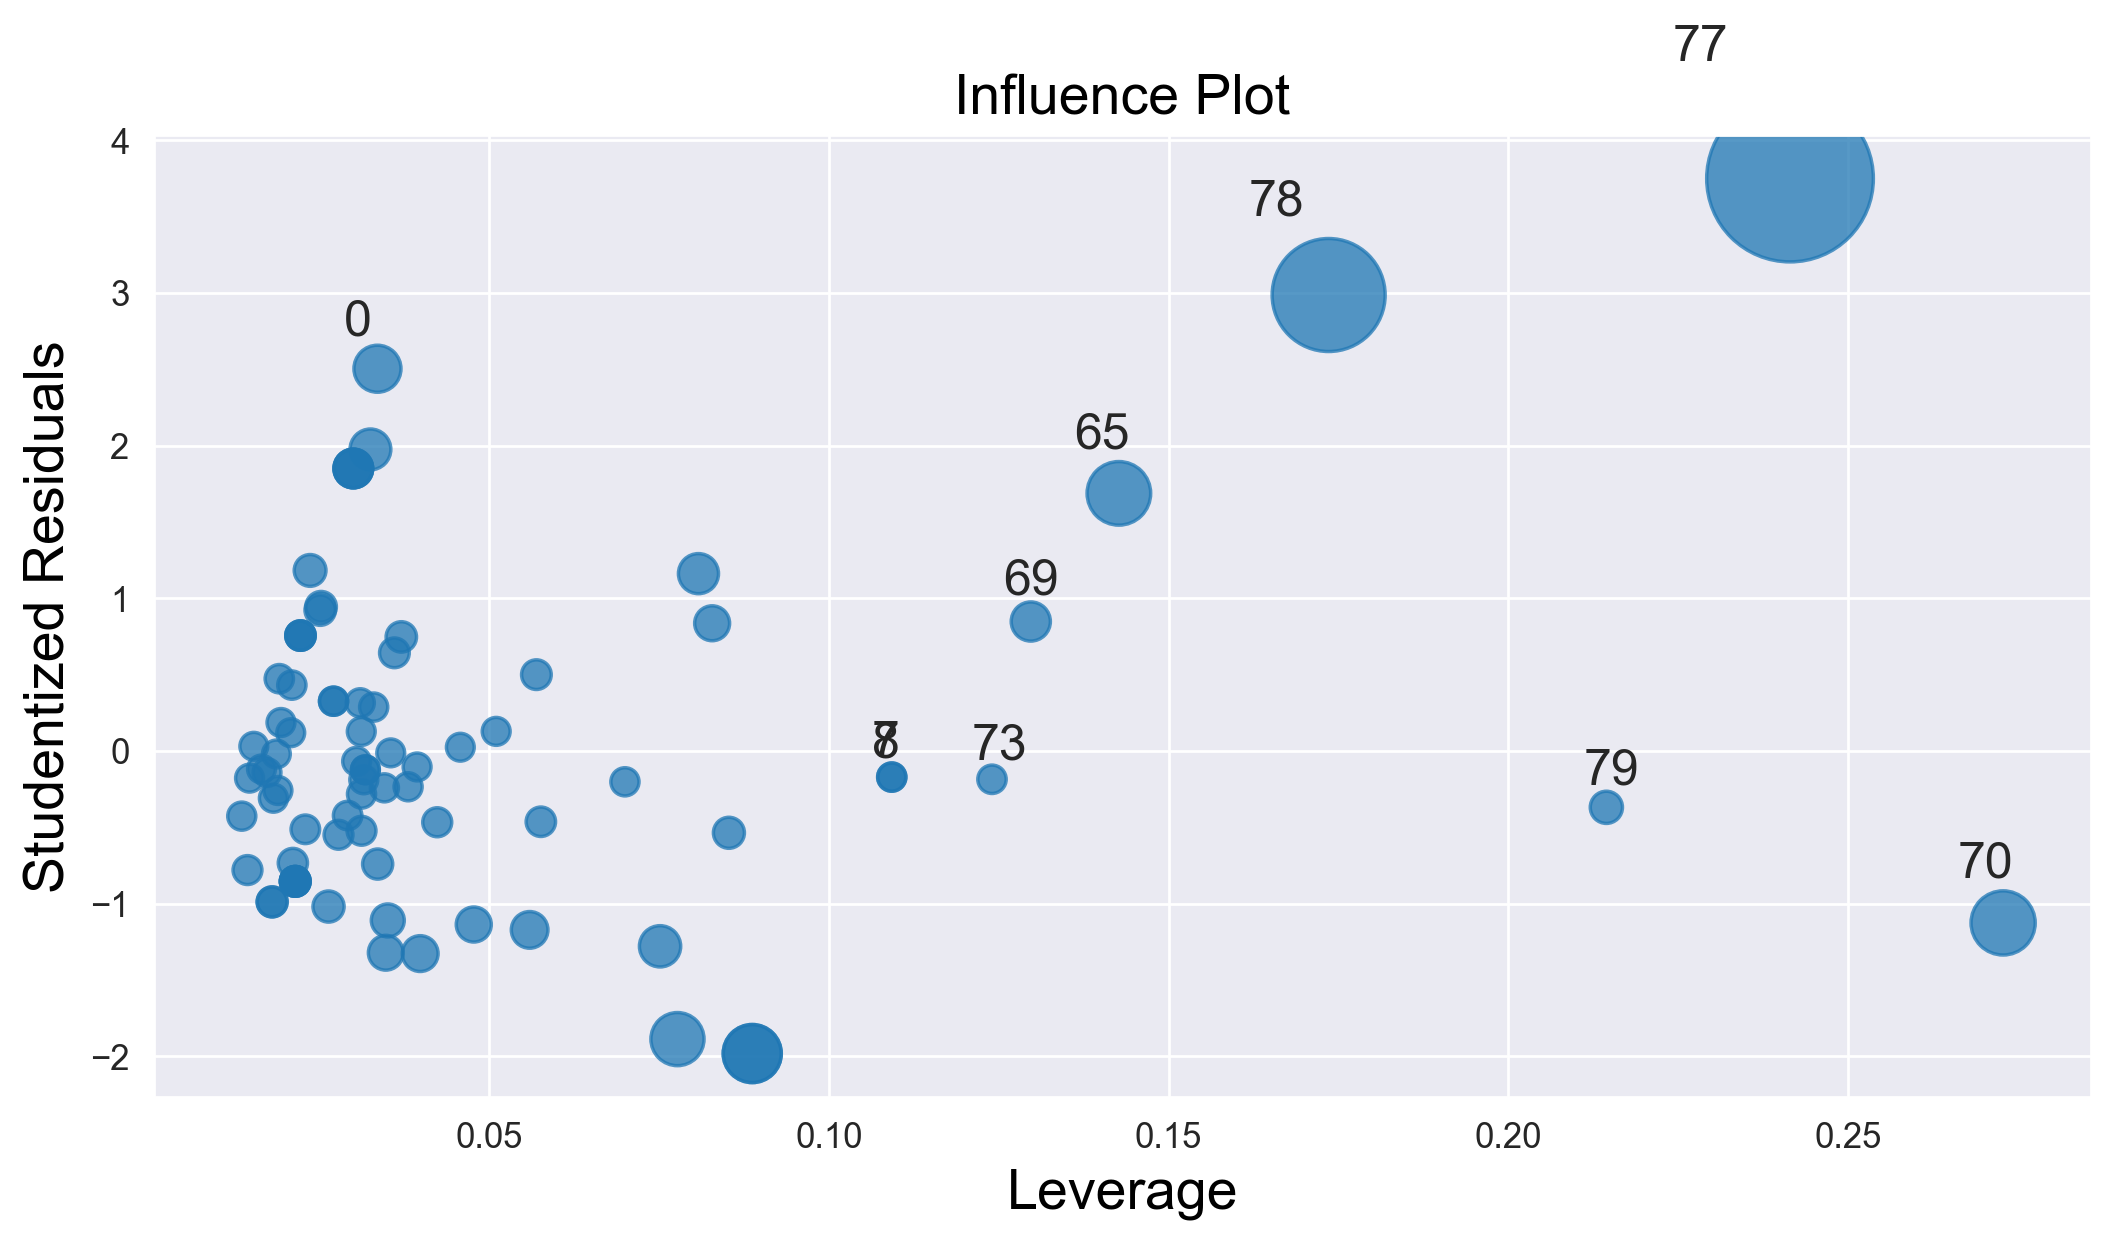

In [116]:
influence_plot(model);

In [117]:
# Calculate cutoff
k = len(df.columns) # 5
n = len(df) # 81

leverage = 3 * (k + 1) / n
leverage

0.225

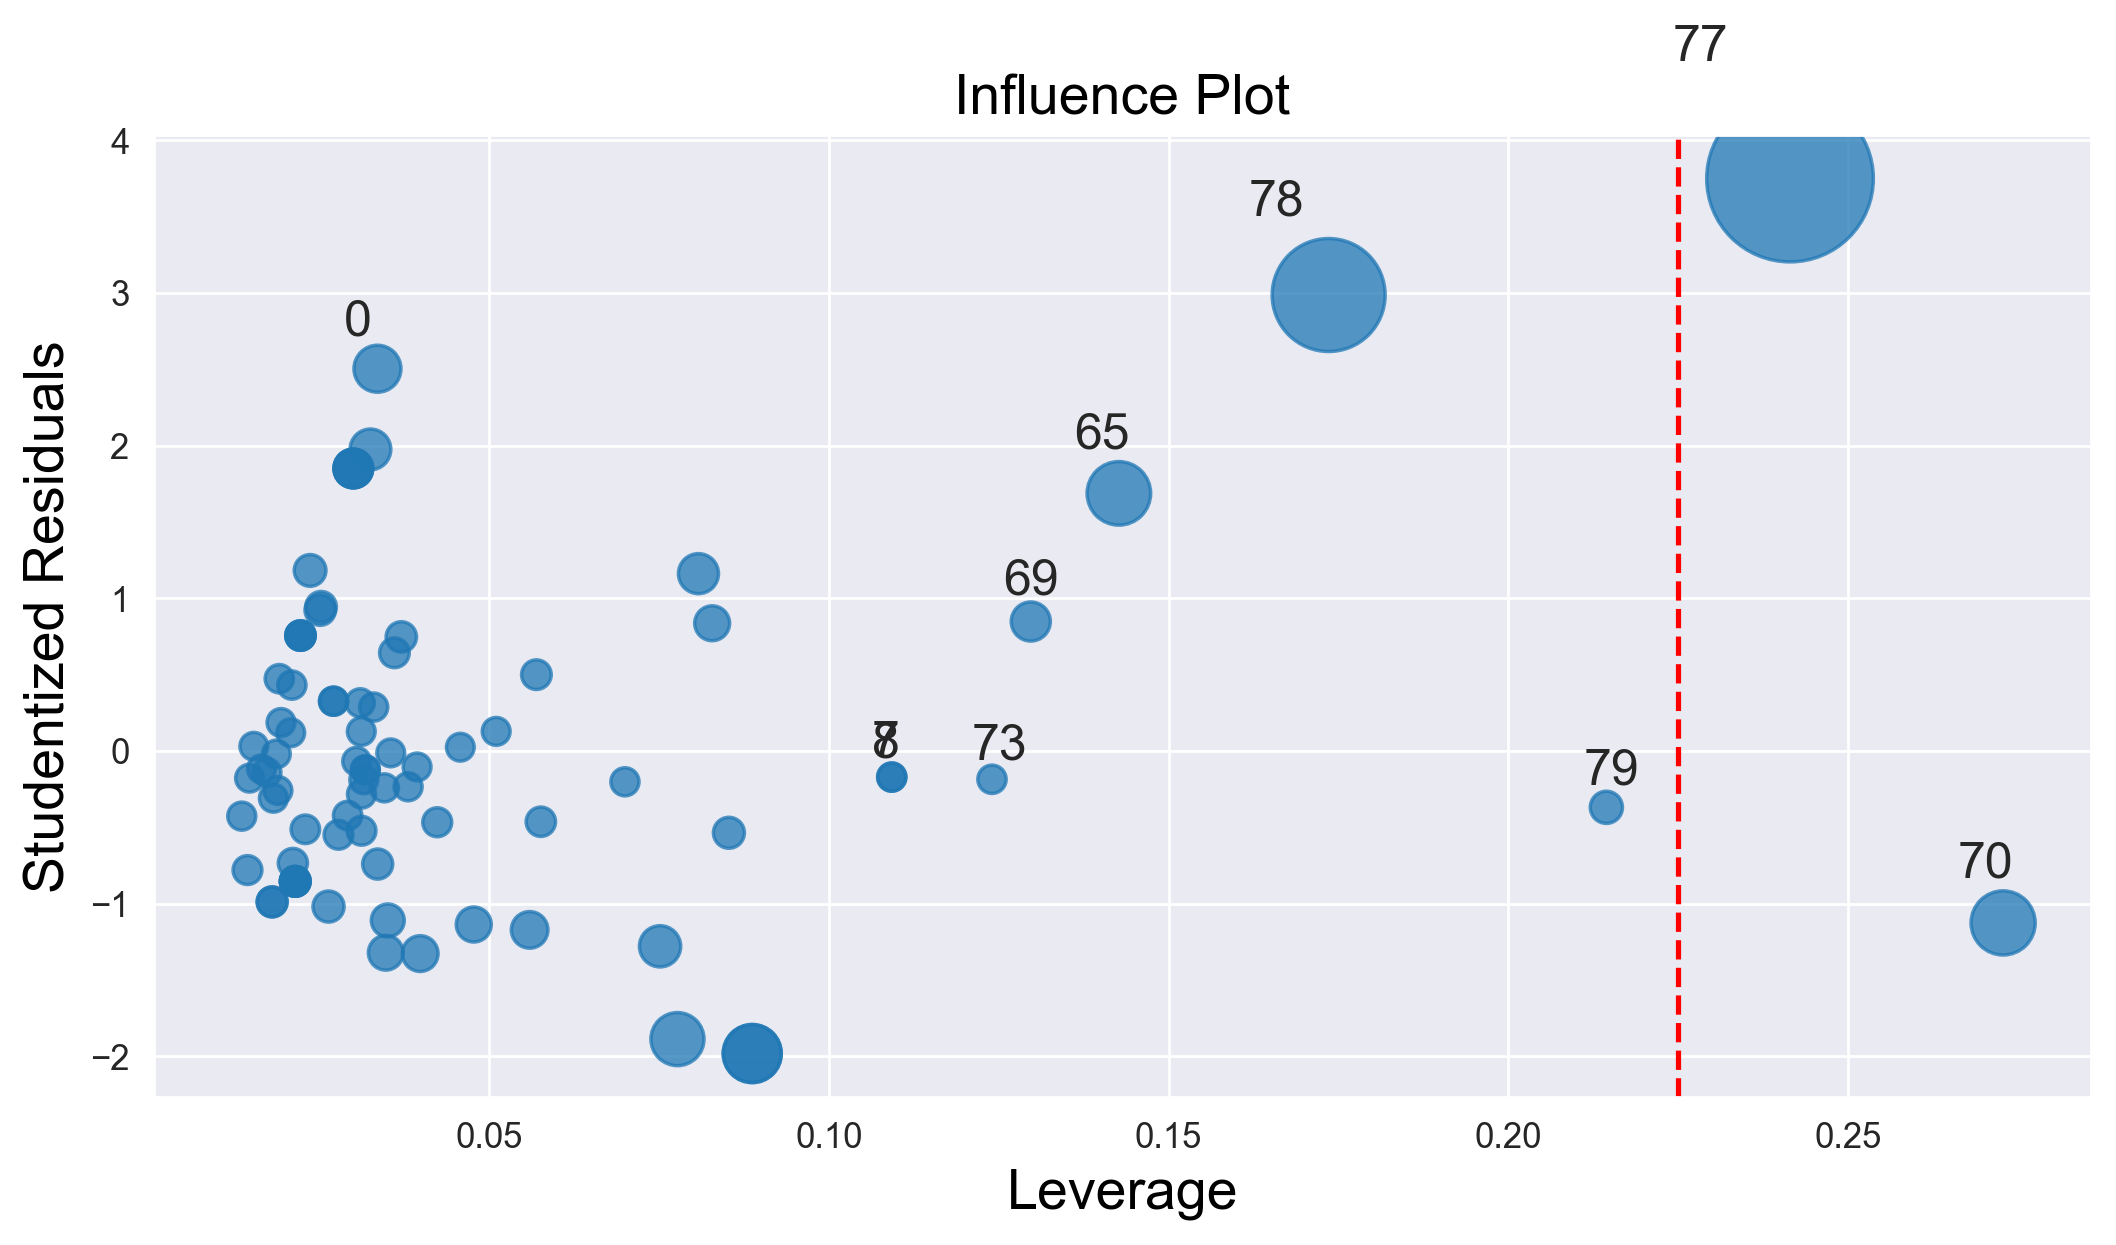

In [118]:
influence_plot(model)
plt.axvline(leverage, linestyle = '--', color = 'red')
# axvline: axis vertical line to draw a vertical line

# **Improving the Model**

In [119]:
df.drop(index=76,inplace=True) # drop 76th record

In [120]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099


In [121]:
# Reset the index
df.reset_index(inplace=True) # adds index column

In [122]:
df

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,74,140,19.086341,129,121.864163,42.618698
75,75,175,18.762837,129,132.864163,42.778219
76,77,263,34.000000,50,151.598513,15.769625
77,78,295,19.833733,119,167.944460,39.423099


In [123]:
df.drop(columns=['index'],inplace=True) # drop index column which is not important

In [124]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [125]:
final_model = smf.ols('MPG~HP+VOL+SP', data=df).fit()

In [126]:
final_model.rsquared # model accuracy is increased from 75% to 82%

0.8143745898806883

As the cook's distance values are <1 we can stop the diagnostic process and finalize the model

# **Predicting for new records**

In [127]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [128]:
test = pd.DataFrame({
    'HP':[56,53.62,95],
    'VOL':[92.6,85.63,75],
    'SP':[110,112,150]
})

In [129]:
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150


In [130]:
final_model.params

Intercept    27.837675
HP           -0.229072
VOL          -0.173415
SP            0.413977
dtype: float64

In [131]:
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150


In [132]:
final_model.predict(test)

0    44.488872
1    47.070723
2    55.166272
dtype: float64